# 분류의 종류

## 2항 분류

- 첫번째 집단일 확률: p예측
=> 두번째 집단일 확률: 1-p

## 3항 이상의 분류

- 각각의 집단별로 p와 (1-p) 계산
- 계산된 p값이 가장 큰 집단으로 분류
- 예: 눈 앞의 꽃이 장미, 백합, 수국?

# 분류 모형의 종류

## 모형

- 로지스틱 회귀모형
- SVM
- 의사결정 나무
- 나이브 베이즈 분류
- 랜덤 포레스트

## Shallow Learning 모형

- 모형의 형태를 사전에 정의
- 모형을 포함하는 계층의 수가 많지 않음

# 로지스틱 회귀모형

- 분류하기 위한 확률 p를 구하는 과정

## 특정사건이 발생할 확률(p) 예측

- 회귀모형의 예측값 p -> [0,1] 의 값 가짐
- 당첨비율(오즈비율)=p/1-p -> [0,무한대]의 값 가짐
> p=0 odds=0, p=1/2 odds=1 , p=1 odds=무한대
- log(p/1-p):[-무한대,무한대]

## p를 예측하기보단 로그를 예측하기 쉬움

- 로그 예측 후, 이로부터 p산출

# Logit함수

- y가 0또는 1에 가까운지에 따라 분류

## 발생확률 p의 계산

- 예측값 log(p/1-p)로부터 p계산하기 위해서는, 예측값을 sigmod변환 하면됨
(딥러닝 모형에서는 활성화함수를 sigmoid로 지정)

- 분류가 잘 이루어지기 위해서는
: 로지스틱 회귀식의 예측값 BX를 x축으로 하고, 
    이로부터 계산되는 p를 y축으로 하는 좌표계에서 p값이 다음과 같이 분포되도록 하는 회귀함수(BX)가 좋은 회귀 함수임.
- 1은 오른편 상단 끝 주변, 0은 왼편 하단 끝 주변

## 비용 함수

- p값이 0 또는 1인 샘플들의 예측된 p가 1이나 0으로부터 얼마나 떨어져있는 가 측정

## Logit 회귀모형 예제

### 1) 100개의 샘플데이터 생성

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [27]:
from sklearn.datasets import make_classification

In [28]:
X,y=make_classification(n_samples=100,n_features=2,
                        n_classes=2,n_redundant=0,random_state=42)

In [29]:
print(X[0],y[0])

[0.55942643 2.38869353] 0


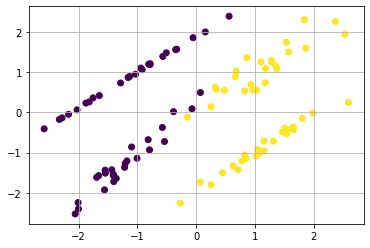

In [5]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.grid(True)
plt.show()

### 2) Train data와 test data 분리

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
train_X,test_X,train_y,test_y=train_test_split(X,y,random_state=42)

In [8]:
from sklearn.linear_model import LogisticRegression

### 3) 모형지정

In [9]:
model=LogisticRegression(random_state=42)

### 4) 모형학습(.fit)

In [10]:
model.fit(train_X,train_y)

LogisticRegression(random_state=42)

### 5) 분류값 예측

In [11]:
pred_y=model.predict(test_X)

In [12]:
print(pred_y)

[0 1 1 0 1 0 0 0 1 1 1 0 1 0 0 1 1 1 0 0 0 0 1 0 1]


In [13]:
print(test_y)

[0 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 0 1 0 1]


In [14]:
model.score(test_X,test_y) #정확도

0.96

### 6) 모형결과 검토

In [15]:
model.coef_[0] #b0와 b1(=계수)

array([ 3.00390095, -0.65618988])

In [19]:
model.intercept_ #a(=절편)

array([0.23722177])

- 모형 가중치들 출력
- 분류식의 계산
-> y=a+b0X[0]+b1X[1]
-> y=0.23722177+3.00390095*X[0]-0.65618988*X[1]

- 테스트 데이터의 결과 검증

### 7) 모형 결과 시각화

In [20]:
line_x=np.linspace(min(X[:,0]),max(X[:,0]))
line_x

array([-2.58590856, -2.48025248, -2.3745964 , -2.26894031, -2.16328423,
       -2.05762815, -1.95197207, -1.84631599, -1.7406599 , -1.63500382,
       -1.52934774, -1.42369166, -1.31803558, -1.21237949, -1.10672341,
       -1.00106733, -0.89541125, -0.78975516, -0.68409908, -0.578443  ,
       -0.47278692, -0.36713084, -0.26147475, -0.15581867, -0.05016259,
        0.05549349,  0.16114957,  0.26680566,  0.37246174,  0.47811782,
        0.5837739 ,  0.68942998,  0.79508607,  0.90074215,  1.00639823,
        1.11205431,  1.2177104 ,  1.32336648,  1.42902256,  1.53467864,
        1.64033472,  1.74599081,  1.85164689,  1.95730297,  2.06295905,
        2.16861513,  2.27427122,  2.3799273 ,  2.48558338,  2.59123946])

In [435]:
X[:,1]

array([ 2.38869353, -0.7173148 , -1.92487377, -0.1368559 , -0.42795824,
        1.19664076, -2.25553963,  0.54914434, -1.26898369, -1.79532002,
        0.24472415,  0.49429823, -1.20592943,  0.68811892, -0.35885569,
       -1.56826626, -1.08324727, -0.6795874 , -0.38919817, -0.04862909,
       -1.42922002, -0.11708689, -1.5332749 , -0.40925706, -1.05383855,
        0.08896214, -1.32933233, -0.43131517,  1.25896077,  0.13979096,
        1.85605469, -2.52343407,  0.06194498, -1.57127256,  1.28938375,
        0.55600276,  0.23085877,  1.10009583, -0.86023823,  0.01722979,
        0.62453032,  0.55448398,  1.48052803,  1.02703224, -0.98021491,
       -1.72067112, -1.14658127, -1.73597973, -0.53355799, -1.20946429,
        0.4176729 ,  0.88629356,  1.09180466,  1.25291095,  1.06173727,
       -1.43534875,  1.56931739, -1.50077611, -1.14054824,  0.89075877,
       -0.72427983, -1.00544254,  0.53479393,  0.57304248,  0.73019848,
       -0.71352532, -1.64060704, -0.17593681,  1.56010259,  0.73

In [424]:
X[:,0]

array([ 0.55942643,  1.31217492, -1.5598485 , -2.2813861 ,  1.56070438,
       -0.80804463, -0.27062383,  0.480502  , -1.20757158,  0.25415746,
        2.59123946,  0.07123641, -1.17762637,  0.93343952,  1.65214494,
       -1.40735658,  1.02255619, -0.81680628,  1.50575249, -2.17105282,
        0.71479373, -0.15013844, -1.4117586 , -2.58590856,  0.82600732,
       -0.07133524,  0.6273745 ,  1.65882246,  1.2798899 ,  0.25058844,
       -0.05319823, -2.05832072, -2.02632079, -1.65830375,  1.28008347,
        0.96423311, -1.87653774, -0.94275087, -1.09831681, -0.38566776,
        0.32725188,  1.03110238, -0.50833095,  0.68057323,  1.08266027,
       -1.40210053,  0.85239186,  0.06845616,  1.53703587,  0.77861318,
       -1.64832073,  0.66530077,  1.17869556,  1.09885263, -0.91916686,
       -1.54851014, -0.3313761 ,  0.4505902 , -1.00634985, -1.13207427,
       -0.53963044,  1.08659413,  0.82584805,  0.34129395, -1.28568005,
        1.15199146, -1.36045573, -2.3279946 , -0.34898484,  1.17

In [21]:
line_y= -model.coef_[0][0]/model.coef_[0][1]*line_x \
        - model.intercept_/model.coef_[0][1]

In [22]:
line_y

array([-11.4762382 , -10.99256661, -10.50889502, -10.02522343,
        -9.54155183,  -9.05788024,  -8.57420865,  -8.09053706,
        -7.60686547,  -7.12319388,  -6.63952229,  -6.1558507 ,
        -5.6721791 ,  -5.18850751,  -4.70483592,  -4.22116433,
        -3.73749274,  -3.25382115,  -2.77014956,  -2.28647797,
        -1.80280638,  -1.31913478,  -0.83546319,  -0.3517916 ,
         0.13187999,   0.61555158,   1.09922317,   1.58289476,
         2.06656635,   2.55023795,   3.03390954,   3.51758113,
         4.00125272,   4.48492431,   4.9685959 ,   5.45226749,
         5.93593908,   6.41961067,   6.90328227,   7.38695386,
         7.87062545,   8.35429704,   8.83796863,   9.32164022,
         9.80531181,  10.2889834 ,  10.772655  ,  11.25632659,
        11.73999818,  12.22366977])

In [23]:
0.2372+3.0039*X[0]-0.6561*X[1]

array([1.05674309, 7.88322672])

In [24]:
0.2372+3.003*X[:,0]+(-0.6561)*X[:,1]

array([ 0.34993575,  4.64829153, -3.18411537, -6.52401131,  5.20477865,
       -2.97447404,  0.90437619,  1.31985392, -2.55655727,  2.17834433,
        7.85812859,  0.12681387, -2.50800168,  2.58884406,  5.43403647,
       -2.96015231,  4.01865476, -1.76979197,  5.01432763, -6.25056607,
        3.32143682, -0.13684502, -2.99632941, -7.25976985,  3.40912345,
       -0.03538779,  2.99338058,  5.50162974,  3.2547052 ,  0.89800022,
       -1.14031178, -4.28831201, -5.88848344, -3.71177424,  3.23532597,
        2.76799862, -5.54950926, -3.31565373, -2.49664309, -0.93226474,
        0.81018306,  2.9698035 , -2.26069228,  1.60712555,  4.13154779,
       -2.84437556,  3.54920471,  1.58175014,  5.2029861 ,  3.3689049 ,
       -4.98674233,  1.65360102,  3.06048972,  2.71501958, -3.21966392,
       -3.47124364, -1.78755156,  2.57498156, -2.0365549 , -3.74684587,
       -0.9081102 ,  4.15991301,  2.36634339,  0.88613255, -4.10278041,
        4.16477431, -2.77184628, -6.63833564, -1.83438479,  3.27

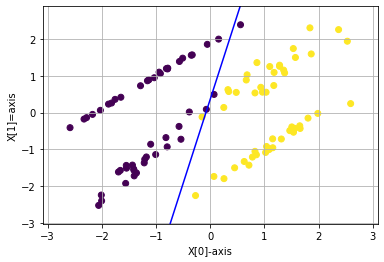

In [25]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.plot(line_x,line_y,color='b')
plt.grid(True)
plt.xlabel('X[0]-axis')
plt.ylabel('X[1]=axis')
plt.xlim(min(X[:,0])-0.5,max(X[:,0])+0.5)
plt.ylim(min(X[:,1])-0.5,max(X[:,1])+0.5)
plt.show()

# 성능평가 방법

## 분류의 성능평가 방법

### 정오분류표

- accuracy vs precision vs recall

## 로지스틱 회귀모형의 성과분석

### 정오분류표

- 분류 성과 표시

In [80]:
from sklearn import metrics

In [82]:
cm=metrics.confusion_matrix(pred_y,test_y)
cm

array([[13,  0],
       [ 1, 11]], dtype=int64)

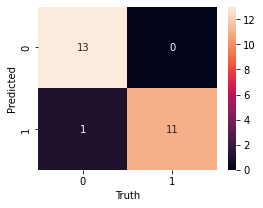

In [84]:
plt.figure(figsize=(4,3))
sns.heatmap(cm,annot=True)
plt.xlabel('Truth')
plt.ylabel('Predicted')
plt.show()

# 나이베이즈 분류

- 조건부 확률 사용하여, 특정 조건 발생했을 경우, 사건 A가 발생할 확률 계산

- P(A|B)=P(B|A)*P(A)/P(B)

## 파이썬의 나이베이즈 분류 모형들

### 모형 종류

- GaussianNB:정규분포
- BernoulliNB:이항분포(결과가 2개 중 1개)
- MultinomialNB: 다항 분포(결과가 여러개 중 1개)
- CategoricalNB:독립변수들이 categorical값들 가질때

### 나이베이즈 분류 예시

- 모형의 계수는 회귀식의 계수와 의미가 다름

- 일종의 가중치
- 회귀식과 같이 그래프의 계수로 활용X

In [91]:
from sklearn.naive_bayes import BernoulliNB

In [92]:
model=BernoulliNB()

In [93]:
model.fit(train_X,train_y)

BernoulliNB()

In [94]:
nb_y_pred=model.predict(test_X)

In [95]:
print(nb_y_pred)

[0 1 1 0 1 0 0 0 1 1 1 0 1 0 0 1 1 1 0 0 0 0 1 0 1]


In [96]:
print(test_y)

[0 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 0 1 0 1]


In [97]:
model.score(test_X,test_y)

0.96

In [98]:
model.coef_[:]

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


array([[-0.07598591, -0.71783979]])

In [99]:
model.intercept_[:]

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `intercept_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


array([-0.65392647])

# Super Vector Machine

- 데이터군을 분리해내는 초 평면을 찾음
- 이들 초평면(2차원의 경우, 선)과 샘플들 사이의 거리가 최대되는 초평면 찾음
: 즉, 분리된 군들사이의 거리가 최대 되도록 함

# 선형 SVC

- 앞에서 소개한 분류 샘플에 대한 선형SVM 분류모형(support Vector Classifier)적용
- 선형 회귀식과 동일 의미로 해석 가능
- 데이터 군을 분리해내는 초 평면 찾음
> 데이터 군을 분리하는 초평면, 또는 선이 선형(직선)이 아닌 경우, 데이터들을 변환하여 선형 분류되도록 실행

In [30]:
from sklearn.svm import LinearSVC

In [31]:
model = LinearSVC()

In [32]:
model.fit(train_X,train_y)

LinearSVC()

In [33]:
y_pred=model.predict(test_X)
print(y_pred)
print(test_y)
model.score(test_X,test_y)

[0 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 0 1 0 1]
[0 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 0 1 0 1]


1.0

## 모형결과 검토 및 시각화

- 선형 회귀식과 동일 의미로 해석가능

In [34]:
print(model.coef_)
print(model.intercept_)

[[ 1.90086154 -0.53057185]]
[0.13540041]


## 선형 SVC와 비선형 SVC 성능비교

- 일반적으로 (비선형)SVC사용하는 것이 안전

In [35]:
from sklearn.datasets import make_gaussian_quantiles

In [36]:
X,y=make_gaussian_quantiles(n_samples=1000,n_features=2,n_classes=2,
                           random_state=42)

In [37]:
train_X,test_X,train_y,test_y=train_test_split(X,y,random_state=42)

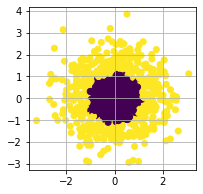

In [38]:
plt.figure(figsize=(3,3))
plt.scatter(X[:,0],X[:,1],c=y)
plt.grid(True)
plt.show()

### 비선형 샘플에 선형SVC 적용

- 성능저조: 일반적으로 비선형SVC사용하는게 안전

In [39]:
model_svc_linear=LinearSVC()

In [40]:
model_svc_linear.fit(train_X,train_y)

LinearSVC()

In [41]:
pred_y_linear=model_svc_linear.predict(test_X)
pred_y_linear[:20]

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1])

In [42]:
test_y[:20]

array([0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1])

In [43]:
model_svc_linear.score(test_X,test_y)

0.528

In [44]:
print(model_svc_linear.coef_)
print(model_svc_linear.intercept_)

[[0.06450336 0.07224471]]
[0.00026422]


In [45]:
### 비선형 샘플에 비선형 SVC적용

In [46]:
from sklearn.svm import SVC

In [47]:
model_svc=SVC()

In [48]:
model_svc.fit(train_X,train_y)

SVC()

In [53]:
pred_y=model_svc.predict(test_X)

In [54]:
pred_y[:20]

array([0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1])

In [55]:
test_y[:20]

array([0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1])

In [56]:
model_svc.score(test_X,test_y)

0.976

# 의사결정 나무

- 수직선(또는 수평선)을 사용하여 대상 데이터 집합을 2개의 부분집단으로 구분(이진트리)->그 다음 또 다른 수직선 사용하여 구분을 반복적 실행

## 회귀모형과의 비교

- 로지스틱 회귀모형
>단순 선형회귀모형: y-ax+b
>다중 선형회귀모형: y=a1x1+a2x2+...anxn+b
-특징
>1개의 식으로 전체집합 구분

## 파이썬에서 의사결정나무 사용한 분류

### 1) Train data와 test data로 분리

In [60]:
from sklearn.datasets import make_classification

In [57]:
X,y=make_classification(n_samples=50,n_features=2,n_classes=2,
                       n_redundant=0,random_state=42)

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
train_X,test_X,train_y,test_y=train_test_split(X,y,random_state=42)

### 2) 모형지정 및 학습

In [61]:
from sklearn.tree import DecisionTreeClassifier

In [62]:
model=DecisionTreeClassifier()

In [63]:
model.fit(train_X,train_y)

DecisionTreeClassifier()

In [64]:
pred_y=model.predict(test_X)

In [65]:
print(pred_y) #교안에는 샘플 50개로 결과출력함

[1 0 1 1 1 1 1 1 1 0 0 0 0]


In [66]:
print(test_y)

[1 0 1 1 1 1 1 1 1 0 0 0 0]


In [67]:
model.score(test_X,test_y)

1.0

### 모형의 설명 가능성

- 각 단계별로 구분 기준 알 수 있음
- 왜 그러한 결과 산출됐는지 알수잇음

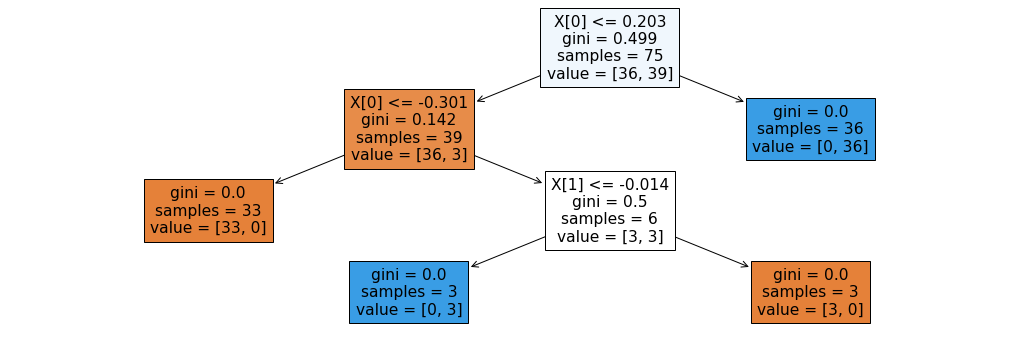

In [246]:
from sklearn.tree import plot_tree
plt.figure(figsize=(18,6)) 
plot_tree(model,filled=True) #교안에는 샘플 100개로 결과출력함
plt.show()

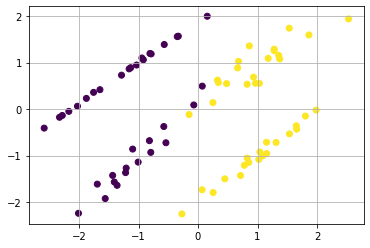

In [238]:
plt.scatter(train_X[:,0],train_X[:,1],c=train_y)
plt.grid(True)
plt.show()

## 의사결정나무를 사용한 예측

### 의사결정나무의 생성방법

#### Tree의 생성

- 분할변수와 분할점의 결정
- 비용함수를 최소화하도록 현재 집합을 2개의 세부집합으로 분할
- 분할을 통해 줄어든 비용값(원래 집합의 비용값-분할된 2집합의 비용 합친값)이 가장 커지도록 분할 실행
: 비용함수가 Entropy일 경우, 이를 Information Gain이라고 함

#### 비용함수

##### 분류트리 Classification Tree

- Entropy, Gini
- 해당 마지막 노드에 포함된 분류값들 중에서 '가장 다수의 값'을 예측값으로 사용

##### 회귀트리 Regression Tree

- Mean Square Error
- 해당 마지막 노드에 포함된 샘플들의 '평균값'을 예측값으로 사용

### 엔트로피(Entropy)

- 무질서의 수준(무질서도)을 측정하는 값
- ex. 학력차이가 많이나면 무질서한것, 많이 안나면 질서적인 것
- 발생가능한 상태(유형)이 K개이고, 이들 각 상태가 발생할 확률이
p1,p2,...pk일 경우, 
- 이 상태의 무질서수준은 -(p1log(p1)+p2log(p2)+..+pklog(pk))
- 위를 엔트로피라고 함

### Gini

- 무질서도를 측정하기 위한 엔트로피보다 간단한 계산지표

## 과적합(Overfitting)

- 의사결정나무는 가지분할을 계속하면(무질서도를 가장 많이 줄이면), 단말노드(leaf node)들이 같은 값을 갖는 샘플들만 포함하는 트리 만들수있음
- (=비용함수 값 :0)
- 샘플 데이터(훈련데이터)들을 대상으로 할 경우: 최적의 의사결정나무
- 훈련되지 않은 데이터(test data)로 할경우, 예측값(분류값)의 오차 커짐(=과적합)

### 과적합 줄이기 위한 방법


모형의 복잡도를 낮추기

#### 의사결정나무

-단말노드의 수 줄임(=마지막 노드에 포함된 샘플 데이터수 크게함/ 
-노드 하나에 포함되는 샘플의 개수를 수동지정가능하니까 지정하기)

#### 다중선형 회귀모형

- 모형 입력 변수의 수 줄임

#### 인공신경망 모형

- 모형 파라미터(인공 뉴런)의 수 줄임

### 의사결정나무 과적합 해소법

#### 비용함수에 단말노드의 수 추가

- 복잡도를 반영한 비용(Cost Complexity) = 비용함수(무질서도) + a*(단말노드의 수)
: a=복잡도 가중치

#### 가지치기(Pruning a Tree)

- 비용함수의 값을 최소화하는 의사결정 나무 생성
- 복잡도를 반영한 비용을 사용하여 합칠 수 있는 단말노드들을 합쳐서 의사결정 나무의 단말노드 수 줄임

# 랜덤 포레스트(Random Forest)

## 앙상블

- 앙상블 모형 중 하나
- 앙상블: 여러개의 예측 모형 만든 후, 이들을 조합해 하나의 최적화된 최종 예측 모델 만드는 방법
- 앙상블 종류
-> 배깅(Bootstrap aggregating):전체 훈련 데이터로부터(중복 샘플링 통하여)여러개의 샘플 만들어서 이들 각 샘플 사용한 모형 생성
-> 부스팅(Boosting): 잘못 분류된 표본에 더 큰 가중치 부여하여 새로운 분류규칙(=의사결정나무) 만들어냄

### 부스팅(Boosting)

- 배깅과 유사
- 배깅(중의 하나인 랜덤포레스트): 학습 중 각 표본에 대해 동일 확률 부여
- 부스팅: 잘못 분류된 표본에 더 큰 가중치 부여하여 새로운 분류규칙(=의사결정나무) 만들어냄
- 세부모형들: AdaBoost, GBM

### AdaBoost

In [314]:
from sklearn.ensemble import AdaBoostClassifier

In [315]:
model=AdaBoostClassifier()

In [316]:
model.fit(train_X,train_y)

AdaBoostClassifier()

In [317]:
pred_y=model.predict(test_X)

In [318]:
print(test_y)

[0 1 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 0 0 0 0 1 0 1]


In [319]:
print(pred_y)

[0 1 1 0 1 0 0 0 1 1 1 0 1 0 0 1 1 1 0 0 0 0 1 0 1]


In [320]:
model.score(test_X,test_y)

0.96

### GBM

In [334]:
from sklearn.ensemble import GradientBoostClassifier

SyntaxError: invalid syntax (3435143141.py, line 1)

## 랜덤포레스트

## 랜덤 포레스트 특징

- 배깅을 의사결정나무에 적용한 알고리즘
- 전체 훈련 데이터로부터(중복 샘플링 통해)여러개의 샘플 만들고, 이들 각 샘플을 사용하여 의사결정나무 모형 생성
- 랜덤 포레스트의 예측값은 각 나무의 예측값들을 모아서 평균값 사용
- 추가적인 무작위성 보장 방안:입력변수들 중에서 일부만을 사용하여 트리 생성

## 랜덤포레스트 사용 분류프로그램

- Random Forest파라미터들: Forest구성하는 트리 수, 비용함수, 단말 노드의 최소 샘플수 등

In [305]:
from sklearn.datasets import make_classification
X,y=make_classification(n_samples=100,n_features=2,n_classes=2,
                       n_redundant=0,random_state=42)
from sklearn.model_selection import train_test_split
train_X,test_X,train_y,test_y=train_test_split(X,y,random_state=42)

In [306]:
from sklearn.ensemble import RandomForestClassifier

In [307]:
model=RandomForestClassifier()

In [308]:
model.fit(train_X,train_y)

RandomForestClassifier()

In [309]:
pred_y=model.predict(test_X)

In [310]:
model.score(test_X,test_y)

0.96

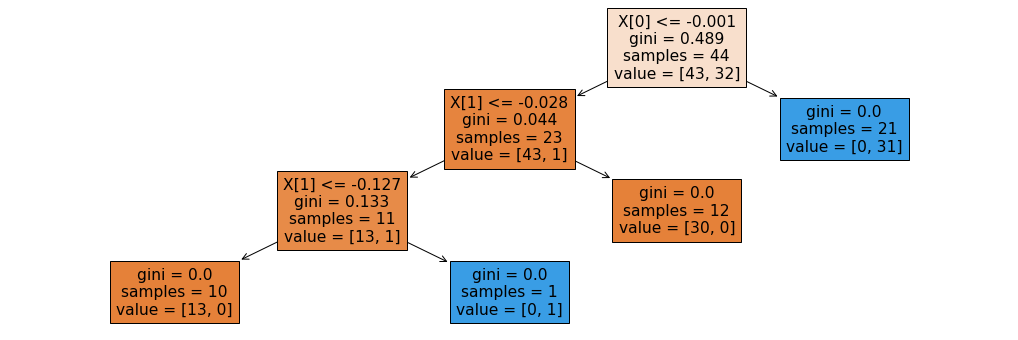

In [313]:
from sklearn.tree import plot_tree
plt.figure(figsize=(18,6))
plot_tree(model.estimators_[98],filled=True)
plt.show()

## K-NN 분류

- 데이터를 직접 참조해서, 새로운 데이터와 가까운 데이터들의 값으로 새로운 데이터의 값 추정
- 모형 학습X
- 가까운 데이터 찾기 위해 거리함수 사용

## K-NN 분류예제

- 특별한 지정없으면, K=5, 거리함수: 기하학적거리

In [198]:
from sklearn.neighbors import KNeighborsClassifier

In [199]:
model=KNeighborsClassifier()

In [200]:
model.fit(train_X,train_y)

KNeighborsClassifier()

In [201]:
pred_y=model.predict(test_X)

In [202]:
model.score(test_X,test_y)

1.0

## 거리 측정방법

- Euclidian distance
- Manhattan distance
- Mahalanobis distance

# 복잡한 다항분류 예제

100000개 데이터를 5개 집단으로 분류하는 예제

In [340]:
X,y=make_classification(n_samples=100000,n_features=20,n_classes=5,
                       n_informative=5,n_redundant=0,random_state=42)
from sklearn.model_selection import train_test_split
train_LX,test_LX,train_Ly,test_Ly=train_test_split(X,y,random_state=42)

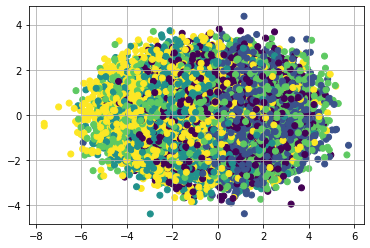

In [332]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.grid(True)
plt.show()

## 분류모형 비교

### 1) 나이베이즈

In [337]:
from sklearn.naive_bayes import GaussianNB

In [338]:
NBmodel=GaussianNB()

In [342]:
NBmodel.fit(train_LX,train_Ly)

GaussianNB()

In [343]:
nb_y_pred=NBmodel.predict(test_LX)

In [344]:
print(nb_y_pred)

[4 0 4 ... 1 2 4]


In [345]:
print(test_Ly)

[4 0 4 ... 1 4 0]


In [346]:
NBmodel.score(test_LX,test_Ly)

0.59628

In [348]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(nb_y_pred,test_Ly)
cm

array([[2937,  248,  958, 1020,  242],
       [ 496, 4124,   67,  597,  457],
       [ 559,  280, 2864,  691,  475],
       [ 328,  294,  384, 1536,  401],
       [ 654,   17,  762, 1163, 3446]], dtype=int64)

### 2) 랜덤포레스트

In [367]:
X,y=make_classification(n_samples=100000,n_features=20,n_classes=5,
                       n_informative=5,n_redundant=0,random_state=42)
from sklearn.model_selection import train_test_split
train_LX,test_LX,train_Ly,test_Ly=train_test_split(X,y,random_state=42)

In [368]:
from sklearn.ensemble import RandomForestClassifier

In [369]:
RFmodel=RandomForestClassifier()

In [373]:
RFmodel.fit(train_LX,train_Ly)

RandomForestClassifier()

In [374]:
pred_Ly=RFmodel.predict(test_LX)

In [375]:
print(pred_Ly)

[4 0 4 ... 1 4 0]


In [376]:
print(test_Ly)

[4 0 4 ... 1 4 0]


In [377]:
RFmodel.score(test_LX,test_Ly)

0.85604

In [378]:
from sklearn.metrics import confusion_matrix
confusion_matrix(pred_Ly, test_Ly)

array([[3987,  129,  169,  332,   71],
       [ 217, 4555,   73,   61,  193],
       [ 265,  148, 4227,  301,  127],
       [ 178,   83,  260, 4153,  151],
       [ 327,   48,  306,  160, 4479]], dtype=int64)